**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *

settings_dict = {'': 'name', 'inflate': 'config.p_inflate', 'ms': 'config.ms_upper'}
ana = Analysis('inflationrate', settings_dict) #tq1newdata

In [2]:
ana_inf = InflationrateAnalysis('inflationrate', settings_dict)

c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experime

In [3]:
ana_inf.best_config_results_median

,dataset_name,config_id,config.ms_upper,config.p_inflate,test.rmse,test.accuracy,test.f1_score,test.roc_auc,nodes_count
0,auction,28,5.0,0.5,0.286973,0.885808,0.398551,0.822038,251.0
1,auction,43,1.0,0.5,0.278627,0.908646,0.523431,0.836142,660.0
2,autism,24,5.0,0.3,0.256315,0.839041,0.747475,0.967958,205.0
3,autism,40,5.0,0.3,0.011332,1.000000,1.000000,1.000000,346.5
4,biomed,19,1.0,0.1,0.344969,0.825397,0.772370,0.906522,290.0
5,biomed,35,1.0,0.1,0.302248,0.880952,0.818605,0.911956,323.0
6,credit,17,0.1,0.1,0.397580,0.798817,0.000000,0.606863,448.0
7,credit,36,5.0,0.1,0.397508,0.798817,0.000000,0.616694,109.0
8,darwin,19,1.0,0.1,0.464452,0.660377,0.684066,0.742877,344.0
9,darwin,38,0.5,0.3,0.368626,0.820755,0.822479,0.903846,1659.5


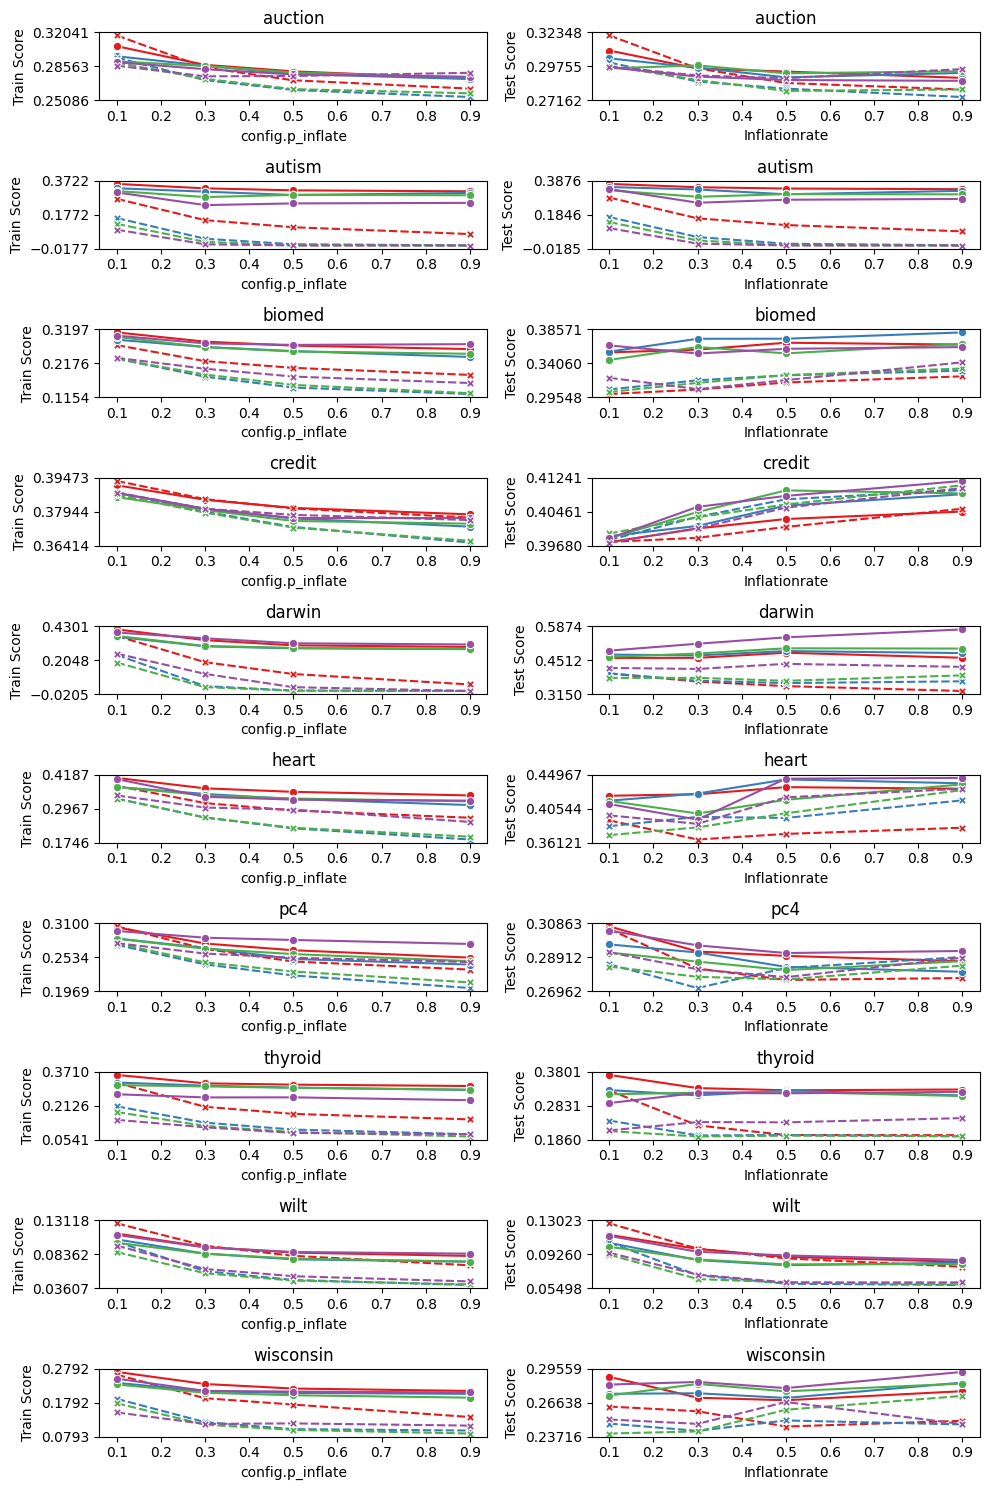

In [4]:
plot_performance_by_p_inflate_with_ms(ana_inf.results_median)

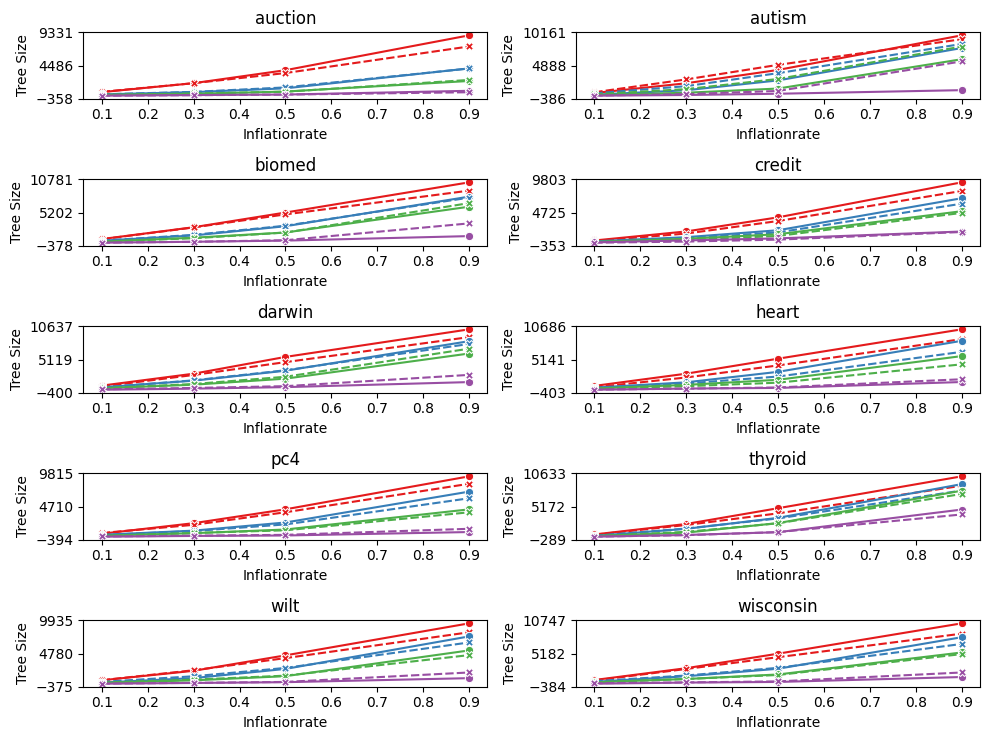

In [5]:
plot_tree_size_by_p_inflate_with_ms(ana_inf.results_median)

Visualization for the Median Test Error (RMSE) of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

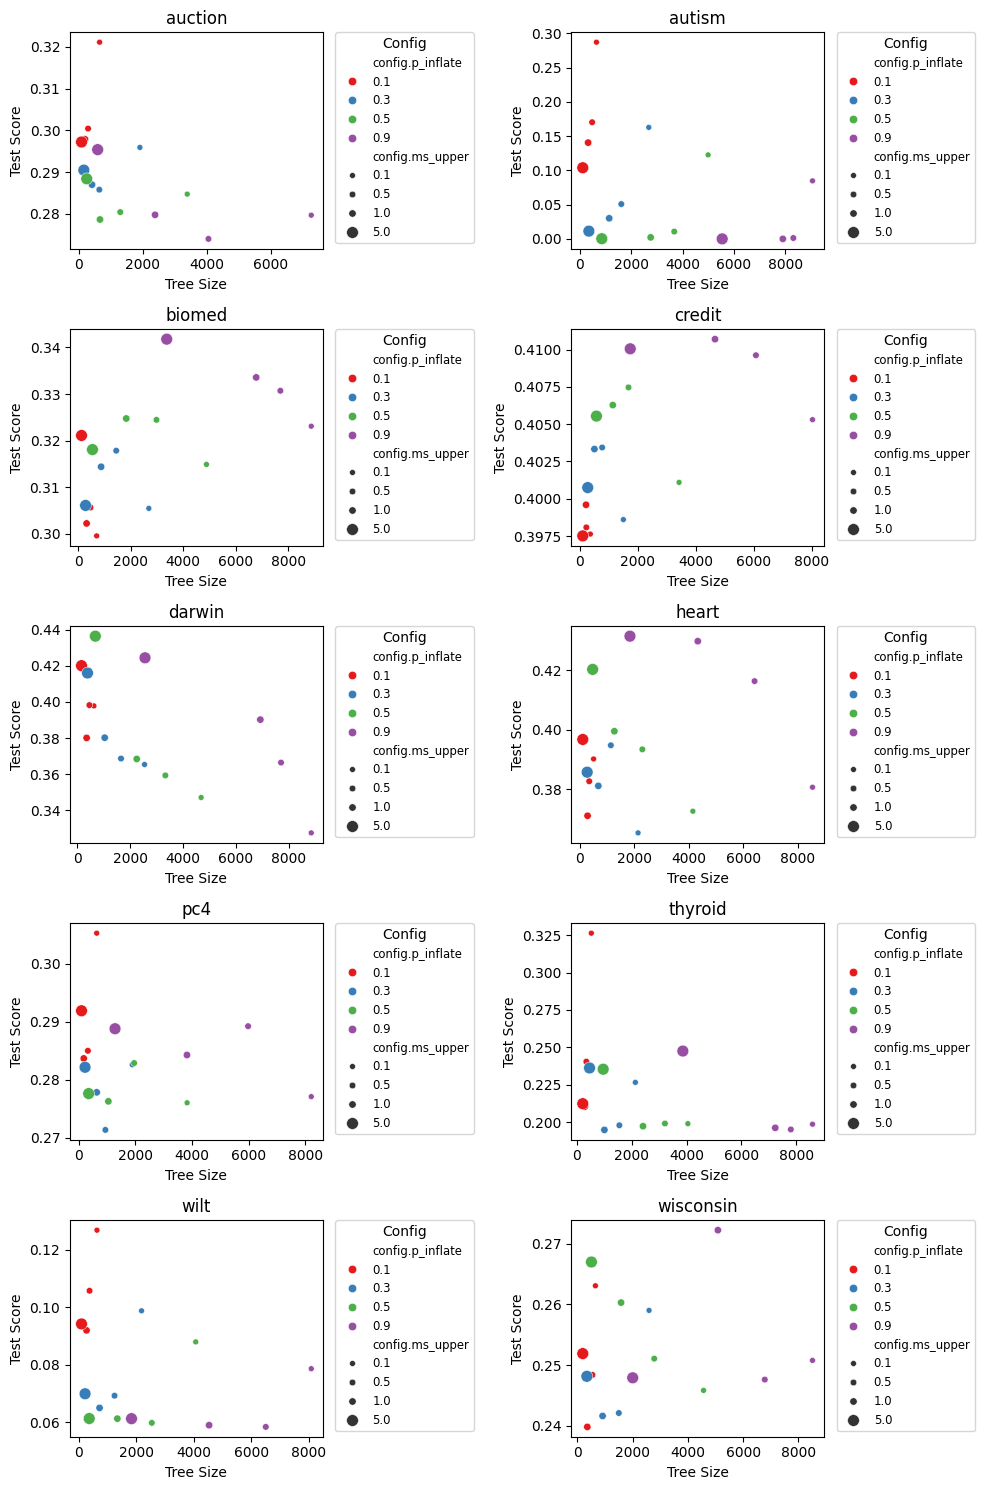

In [6]:
plot_performance_complexity_tradeoff(ana_inf.results_median, 'SLIM+SIG1')

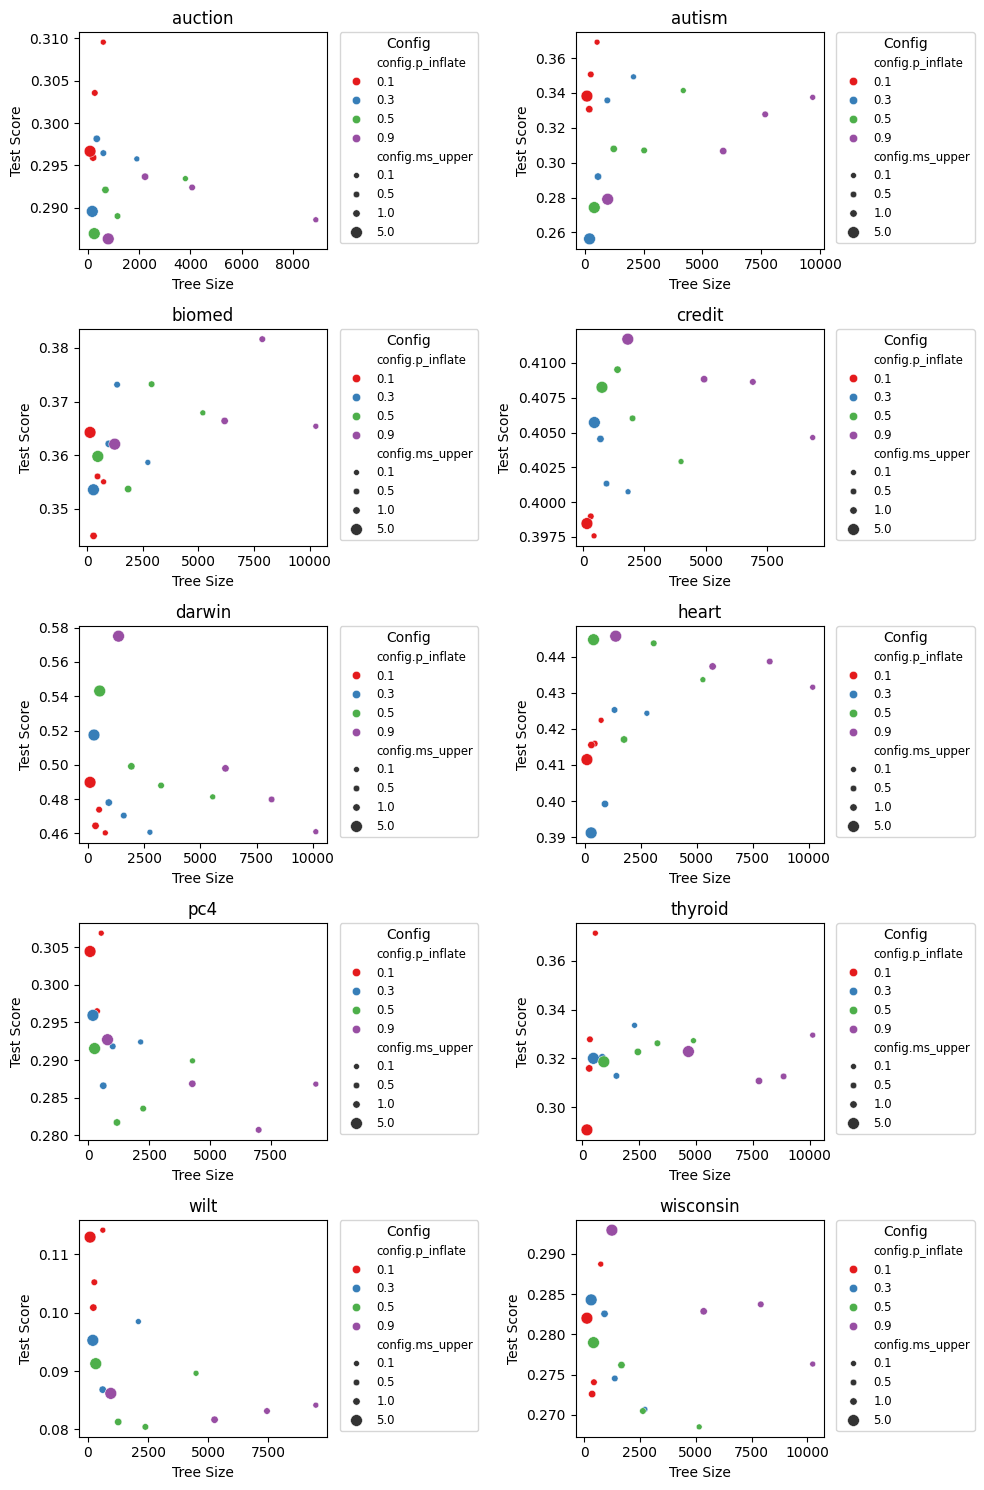

In [7]:
plot_performance_complexity_tradeoff(ana_inf.results_median, 'SLIM*SIG1')

In [8]:
from sklearn.preprocessing import MinMaxScaler
def get_min_euclidian_distance(results):
    unique_datasets = results['dataset_name'].unique()
    unique_models = results['name'].unique()
    
    best_configs = []
    
    for dataset in unique_datasets:
        for model in unique_models:
            subset = results[(results['dataset_name'] == dataset) & (results['name'] == model)]
            scaler = MinMaxScaler()
            scaled_values = scaler.fit_transform(subset[['test.rmse', 'nodes_count']])
            subset.loc[:, ['test.rmse', 'nodes_count']] = scaled_values
            subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5

            subset = subset.sort_values('euclidian_distance')
            subset = subset.drop_duplicates(subset=['dataset_name', 'name'], keep='first')
            best_configs.append(subset)
    
    return pd.concat(best_configs, ignore_index=True)

get_min_euclidian_distance(ana_inf.results_median)

C:\Users\leond\AppData\Local\Temp\ipykernel_4828\1494037237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
C:\Users\leond\AppData\Local\Temp\ipykernel_4828\1494037237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
C:\Users\leond\AppData\Local\Temp\ipykernel_4828\1494037237.py:14: SettingWithCopyWarning: 
A value is try

,dataset_name,config_id,name,config.ms_upper,config.p_inflate,train.rmse,test.rmse,nodes_count,euclidian_distance
0,auction,28,SLIM*SIG1,5.0,0.5,0.277127,0.026706,0.018573,0.037459
1,auction,43,SLIM+SIG1,1.0,0.5,0.262111,0.098557,0.080423,0.150497
2,autism,24,SLIM*SIG1,5.0,0.3,0.232468,0.000000,0.011629,0.016445
3,autism,40,SLIM+SIG1,5.0,0.3,0.006819,0.039454,0.026529,0.054444
4,biomed,19,SLIM*SIG1,1.0,0.1,0.297007,0.000000,0.015482,0.021894
5,biomed,35,SLIM+SIG1,1.0,0.1,0.230325,0.063303,0.022108,0.070603
6,credit,17,SLIM*SIG1,0.1,0.1,0.391376,0.000000,0.031475,0.044512
7,credit,36,SLIM+SIG1,5.0,0.1,0.388079,0.000000,0.000000,0.000000
8,darwin,19,SLIM*SIG1,1.0,0.1,0.366107,0.036033,0.024168,0.049664
9,darwin,38,SLIM+SIG1,0.5,0.3,0.032369,0.377922,0.171881,0.449345


In [9]:
ana_inf.best_config_results_median

,dataset_name,config_id,config.ms_upper,config.p_inflate,test.rmse,test.accuracy,test.f1_score,test.roc_auc,nodes_count
0,auction,28,5.0,0.5,0.286973,0.885808,0.398551,0.822038,251.0
1,auction,43,1.0,0.5,0.278627,0.908646,0.523431,0.836142,660.0
2,autism,24,5.0,0.3,0.256315,0.839041,0.747475,0.967958,205.0
3,autism,40,5.0,0.3,0.011332,1.000000,1.000000,1.000000,346.5
4,biomed,19,1.0,0.1,0.344969,0.825397,0.772370,0.906522,290.0
5,biomed,35,1.0,0.1,0.302248,0.880952,0.818605,0.911956,323.0
6,credit,17,0.1,0.1,0.397580,0.798817,0.000000,0.606863,448.0
7,credit,36,5.0,0.1,0.397508,0.798817,0.000000,0.616694,109.0
8,darwin,19,1.0,0.1,0.464452,0.660377,0.684066,0.742877,344.0
9,darwin,38,0.5,0.3,0.368626,0.820755,0.822479,0.903846,1659.5


In [10]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])
#X['x2'] = X['gen*p_inflate'] * X['gen*p_inflate']
y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.7446984062525334


(array([-2.77158568e+02,  6.49883400e+00, -2.41441289e-11, -2.41222580e-11,
        -2.41926946e-11, -2.43556254e-11, -2.42000594e-11, -2.42894448e-11,
        -2.43214215e-11, -2.43261711e-11, -2.43645621e-11, -5.65262206e+01]),
 333.3008551378862)

In [11]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.7589622832091918

In [12]:
lr.coef_, lr.intercept_

(array([7003.59709821, -542.20042595, 1159.3984375 , 1160.33984375,
         544.44140625, 1201.1328125 ,  882.46484375,  492.234375  ,
        1373.3828125 ,  544.5703125 ,  953.671875  ,  -94.35703125]),
 -646.1063507514054)

Median Test Errors (RMSE) Table

In [13]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,603.0,271.5,206.5,87.5,1910.5,605.0,348.5,174.0,3805.0,1157.5,...,410.5,154.5,3389.5,1293.5,660.0,244.5,7269.0,4052.5,2383.0,587.5
autism,524.0,257.0,193.5,93.5,2071.0,959.0,563.5,205.0,4185.5,2523.0,...,1139.0,346.5,4994.0,3674.0,2755.0,850.0,9061.5,8313.5,7905.0,5542.0
biomed,740.5,468.5,290.0,133.0,2729.0,1348.0,971.0,284.5,5198.5,2898.0,...,876.0,284.0,4889.5,2984.5,1833.5,546.5,8882.0,7705.0,6784.5,3376.0
credit,448.0,315.0,232.0,159.0,1831.0,954.5,709.0,461.0,3986.5,2014.0,...,511.0,280.0,3426.0,1684.0,1143.0,580.0,8023.0,6074.5,4664.5,1744.5
darwin,778.5,503.5,344.0,101.5,2762.0,1599.5,933.5,276.0,5552.0,3258.0,...,1043.5,394.5,4685.5,3334.5,2253.5,689.0,8845.5,7704.5,6923.0,2566.5
heart,734.5,447.5,299.5,101.0,2777.5,1332.5,906.5,288.5,5279.0,3083.5,...,685.0,275.5,4155.5,2300.5,1273.5,476.5,8547.5,6421.0,4335.5,1846.0
pc4,529.0,358.0,224.0,70.0,2148.5,1002.0,613.5,188.0,4281.0,2254.0,...,640.5,228.5,3828.0,1959.0,1051.5,356.5,8207.5,5979.0,3823.0,1286.0
thyroid,576.5,338.0,308.0,207.0,2300.5,1503.5,881.0,491.0,4892.5,3307.0,...,1006.0,464.0,4047.5,3212.0,2412.0,961.0,8589.0,7798.5,7231.5,3864.5
wilt,624.0,270.5,230.0,94.0,2099.0,965.0,618.0,208.5,4494.0,2389.5,...,728.0,225.0,4067.5,2543.0,1346.0,370.0,8078.0,6500.0,4531.5,1838.0


P-Values for the ANOVA Test comparing the performance of different Inflation Rates for each SLIM-Version

In [14]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,1.654353e-06,9.620716e-14
autism,6.438163e-02,8.217795e-21
biomed,6.166785e-01,1.355175e-02
credit,7.575274e-10,1.339624e-11
darwin,2.757825e-01,1.874553e-01
heart,1.136183e-01,7.495074e-03
pc4,8.520194e-07,1.773320e-06
thyroid,9.570435e-01,2.847408e-02
wilt,9.281917e-24,6.365201e-10


P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [10]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.152928,0.020016
autism,0.963121,0.036445
biomed,0.762331,0.080463
credit,0.099128,0.004521
darwin,0.214460,0.874874
heart,0.136356,0.331330
pc4,0.084529,0.669237
thyroid,0.562981,0.942565
wilt,0.020377,0.107363


Countplot for the Sum of best achieved Performance for the different Inflation Rates accross Datasets

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

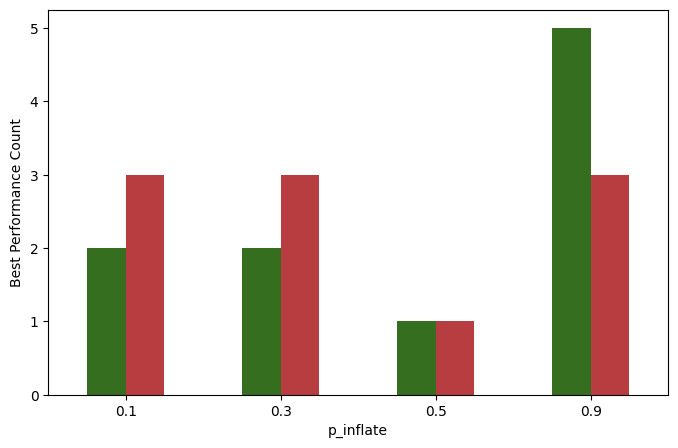

In [16]:
plot_countplot(ana.results, 'test.rmse')

Visualization for the Median Tree Size of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

             SLIM*SIG1                                                     \
dataset_name   auction  autism   biomed  credit   darwin    heart     pc4   
0.1              603.0   524.0    740.5   448.0    778.5    734.5   529.0   
0.1              271.5   257.0    468.5   315.0    503.5    447.5   358.0   
0.1              206.5   193.5    290.0   232.0    344.0    299.5   224.0   
0.1               87.5    93.5    133.0   159.0    101.5    101.0    70.0   
0.3             1910.5  2071.0   2729.0  1831.0   2762.0   2777.5  2148.5   
0.3              605.0   959.0   1348.0   954.5   1599.5   1332.5  1002.0   
0.3              348.5   563.5    971.0   709.0    933.5    906.5   613.5   
0.3              174.0   205.0    284.5   461.0    276.0    288.5   188.0   
0.5             3805.0  4185.5   5198.5  3986.5   5552.0   5279.0  4281.0   
0.5             1157.5  2523.0   2898.0  2014.0   3258.0   3083.5  2254.0   
0.5              687.5  1231.5   1844.5  1402.5   1936.5   1757.0  1175.5   

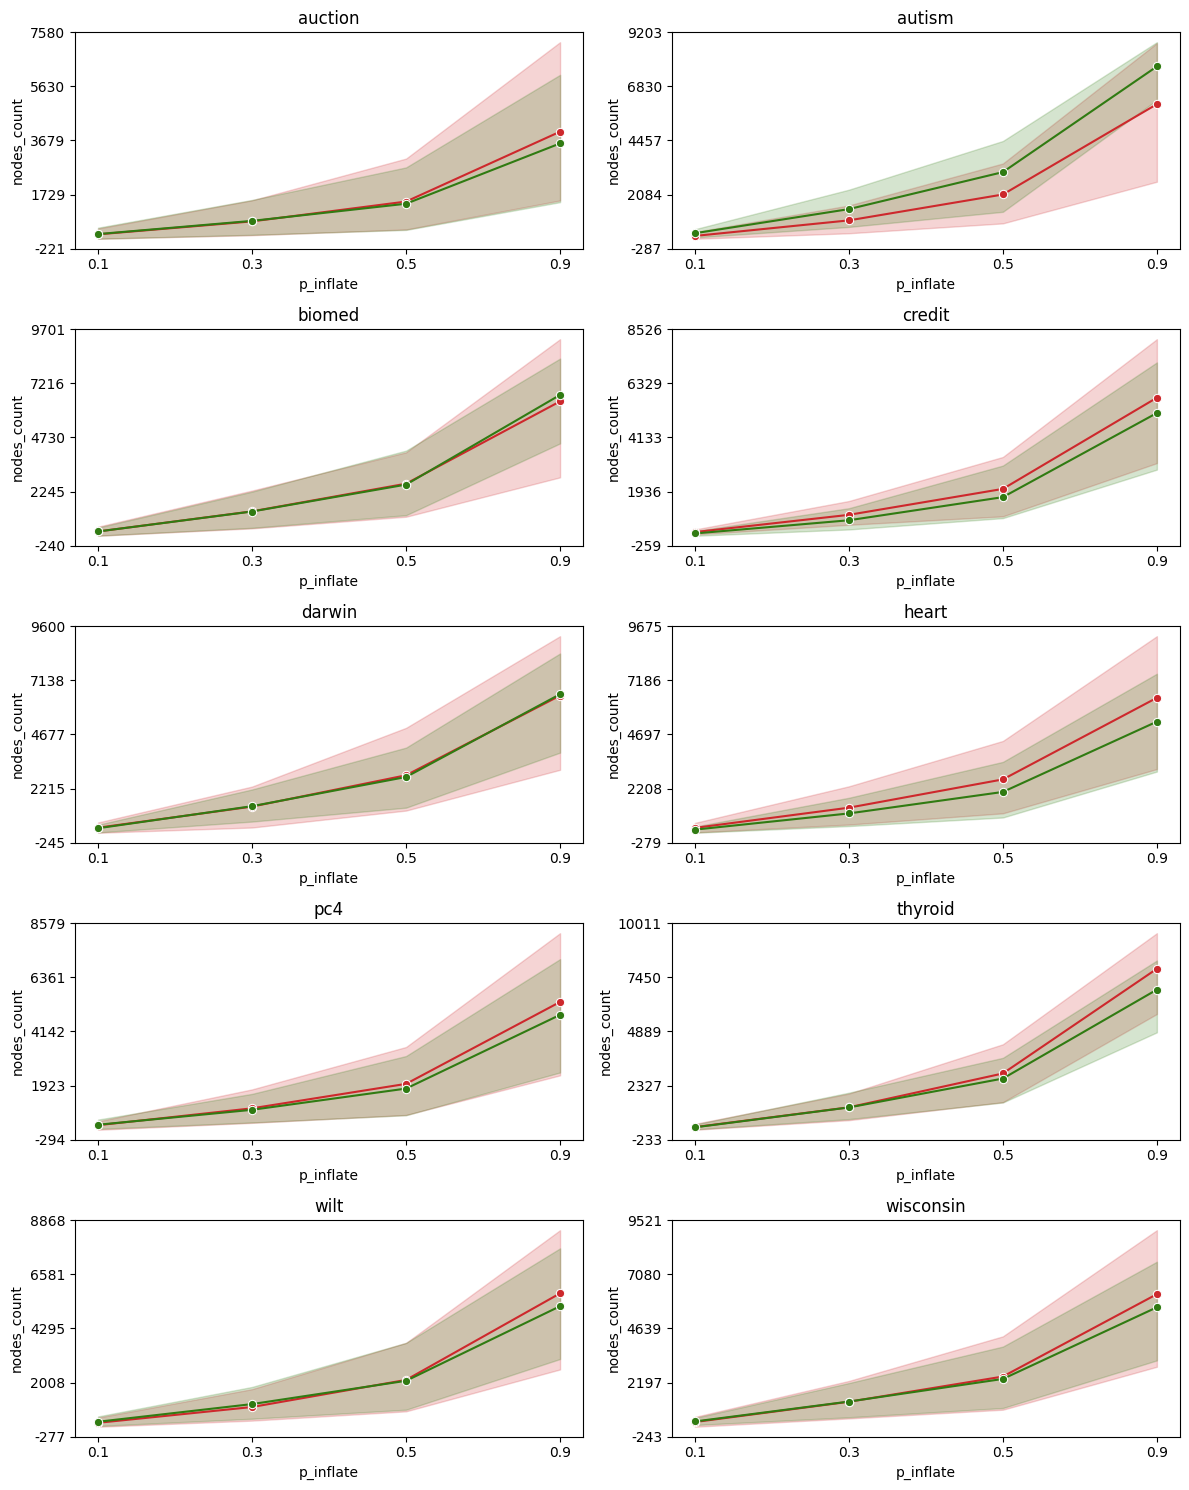

In [17]:
plot_by_p_inflate(ana.results, 'nodes_count') #[ana.results['config.ms_upper']==5]

Median Tree Size Table

In [18]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,603.0,271.5,206.5,87.5,1910.5,605.0,348.5,174.0,3805.0,1157.5,...,410.5,154.5,3389.5,1293.5,660.0,244.5,7269.0,4052.5,2383.0,587.5
autism,524.0,257.0,193.5,93.5,2071.0,959.0,563.5,205.0,4185.5,2523.0,...,1139.0,346.5,4994.0,3674.0,2755.0,850.0,9061.5,8313.5,7905.0,5542.0
biomed,740.5,468.5,290.0,133.0,2729.0,1348.0,971.0,284.5,5198.5,2898.0,...,876.0,284.0,4889.5,2984.5,1833.5,546.5,8882.0,7705.0,6784.5,3376.0
credit,448.0,315.0,232.0,159.0,1831.0,954.5,709.0,461.0,3986.5,2014.0,...,511.0,280.0,3426.0,1684.0,1143.0,580.0,8023.0,6074.5,4664.5,1744.5
darwin,778.5,503.5,344.0,101.5,2762.0,1599.5,933.5,276.0,5552.0,3258.0,...,1043.5,394.5,4685.5,3334.5,2253.5,689.0,8845.5,7704.5,6923.0,2566.5
heart,734.5,447.5,299.5,101.0,2777.5,1332.5,906.5,288.5,5279.0,3083.5,...,685.0,275.5,4155.5,2300.5,1273.5,476.5,8547.5,6421.0,4335.5,1846.0
pc4,529.0,358.0,224.0,70.0,2148.5,1002.0,613.5,188.0,4281.0,2254.0,...,640.5,228.5,3828.0,1959.0,1051.5,356.5,8207.5,5979.0,3823.0,1286.0
thyroid,576.5,338.0,308.0,207.0,2300.5,1503.5,881.0,491.0,4892.5,3307.0,...,1006.0,464.0,4047.5,3212.0,2412.0,961.0,8589.0,7798.5,7231.5,3864.5
wilt,624.0,270.5,230.0,94.0,2099.0,965.0,618.0,208.5,4494.0,2389.5,...,728.0,225.0,4067.5,2543.0,1346.0,370.0,8078.0,6500.0,4531.5,1838.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [19]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,4.230605e-14,1.564423e-15
autism,1.500703e-22,7.274492e-53
biomed,2.453013e-23,7.667909e-37
credit,1.021858e-28,6.246255e-31
darwin,2.697233e-23,8.753166e-34
heart,7.669009e-23,8.485236e-28
pc4,1.431454e-20,2.473243e-23
thyroid,4.478236e-44,2.313032e-48
wilt,3.001208e-23,1.494930e-19


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [20]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014737,1.638573e-02
autism,0.000321,4.577240e-06
biomed,0.000567,3.691382e-04
credit,0.000054,3.064843e-05
darwin,0.000322,4.811165e-05
heart,0.000579,5.832726e-04
pc4,0.000914,9.836134e-04
thyroid,0.000001,1.531539e-07
wilt,0.000768,5.255260e-03
